<a href="https://colab.research.google.com/github/PrabhuNagre/Prabhu/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

In [ ]:
#Import pakages
import pandas as pd
import numpy as np

In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load The csv File Of Hotel Booking Data
df=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

**EXPLORING THE DATA**

In [ ]:
#Reading The DataSet
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Information of df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Sum Of Null,NaN objects
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Replace all NaN values in the 'agent' column with 0
df['agent'].fillna(0, inplace=True)


In [ ]:
# Drop the 'company' column from the DataFrame
# Reason: there are lots of NaN values in the column
df = df.drop(columns=['company'])


In [ ]:
#Dropping remaining NA values 
df.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Descriptive Statastics info
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Negative average daily rate
df["adr"].loc[df["adr"]<0]=0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Min value of average daily rate
df["adr"].min()

0.0

In [ ]:
#Min value of average daily rate
df["adr"].max()

5400.0

In [ ]:
#Highest daily rate for resort hotel
df["adr"].loc[df["hotel"]=="Resort Hotel"].sort_values(ascending=False).head(5)

15083    508.00
13142    450.00
13391    437.00
39155    426.25
39568    402.00
Name: adr, dtype: float64

In [ ]:
#Highest daily rate for resort hotel
df["adr"].loc[df["hotel"]=="City Hotel"].sort_values(ascending=False).head(5)

48515     5400.00
111403     510.00
103912     451.50
103789     375.50
118515     372.33
Name: adr, dtype: float64

The average daily rate of 5400 seems excessively high compared to the next highest rate of 510. I suspect this may be a typographical error and the correct figure should be 540. Let me revise this for you.

"The average daily rate of 540 seems reasonable when compared to the next closest rate of 510."

In [ ]:
#Change ADR 5400 to 540
df["adr"].loc[df["adr"]==5400]=540

In [ ]:
#Final Dataset
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


 **Columns**

In [ ]:
#Columns in Dataframe
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Data Visualization**

In [ ]:
# Import the 'matplotlib.pyplot' module and alias it as 'plt'
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

#Import Seaborn 
import seaborn as sns

1.**Hotels**

Text(0, 0.5, 'Number Of Bookings')

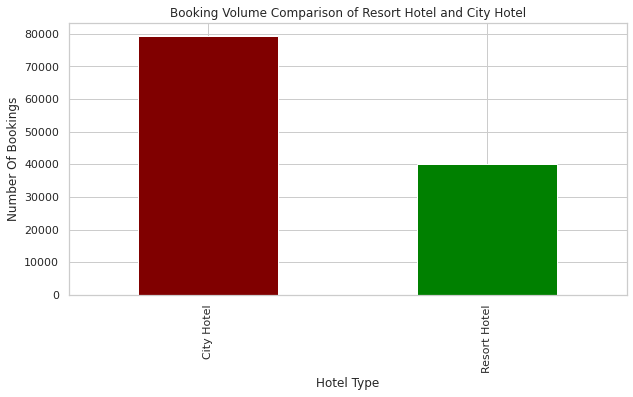

In [ ]:
# Count the number of bookings for each hotel type and 
# Store the results in a variable called 'Hotel_Type'
Hotel_Type = df['hotel'].value_counts()

# Plot a bar chart to compare the number of bookings between Resort Hotel and City Hotel
Hotel_Type.plot(kind='bar', color=['maroon', 'green'], figsize=(10,5))

# Set the title of the plot to 'Booking Volume Comparison of Resort Hotel and City Hotel'
plt.title('Booking Volume Comparison of Resort Hotel and City Hotel')

# Set the x-axis label to 'Hotel Type'
plt.xlabel('Hotel Type')

# Set the y-axis label to 'Number Of Bookings'
plt.ylabel('Number Of Bookings')

Based on the bar chart generated by the code, it appears that the city hotel has received a higher number of bookings compared to the resort hotel. This result can suggest that city hotels are more popular among customers in terms of booking volume. It is possible that city hotels are more conveniently located or offer more attractive amenities, which make them more appealing to customers. On the other hand, the lower number of bookings for resort hotels could indicate that they are not as highly sought after. Further analysis may be needed to fully understand the reasons behind these booking patterns.

**2**. **Month Wise Booking For Each Hotel**

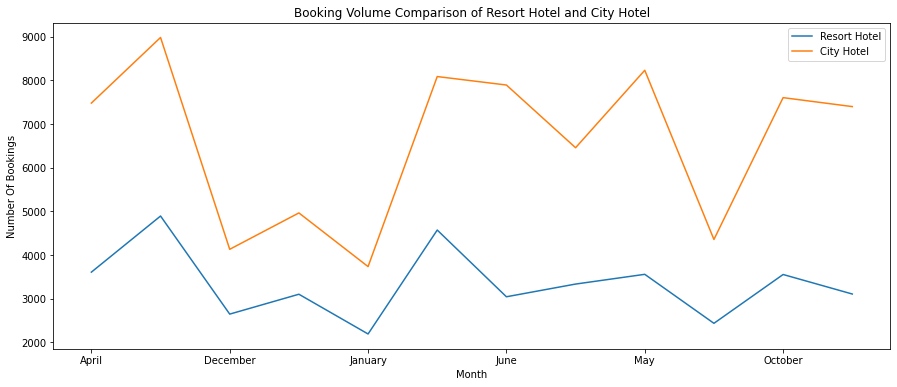

In [ ]:
# Set the figure size
plt.figure(figsize=(15,6))

# Create separate dataframes for Resort Hotel and City Hotel
df_resort = df[df['hotel'] == 'Resort Hotel'] 
df_city = df[df['hotel'] == 'City Hotel']

# Plot a line chart to compare the number of bookings between Resort Hotel and City Hotel
df_resort['arrival_date_month'].value_counts().sort_index().plot(label='Resort Hotel')
df_city['arrival_date_month'].value_counts().sort_index().plot(label='City Hotel')

# Set the title of the plot to 'Booking Volume Comparison of Resort Hotel and City Hotel'
plt.title('Booking Volume Comparison of Resort Hotel and City Hotel')

# Set the x-axis label to 'Month'
plt.xlabel('Month')

# Set the y-axis label to 'Number Of Bookings'
plt.ylabel('Number Of Bookings')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

The plot shows that the City Hotel had a higher number of bookings compared to the Resort Hotel in every month.

**3**. **Year Wise Booking**

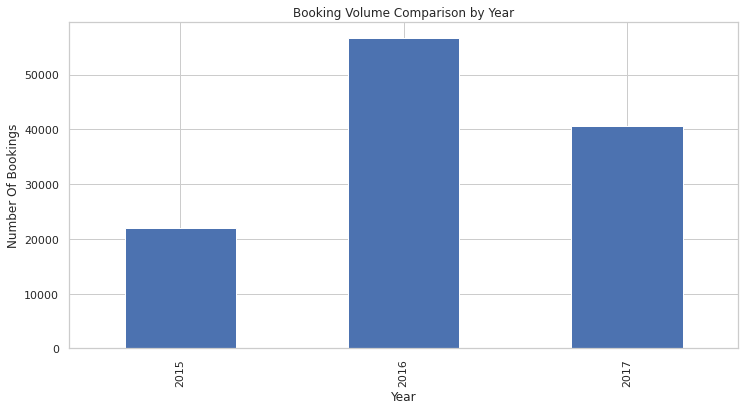

In [ ]:
# Set the figure size
plt.figure(figsize=(12,6))

# Plot a bar chart to compare the number of bookings in each year
df['arrival_date_year'].value_counts().sort_index().plot(kind='bar')

# Set the title of the plot to 'Booking Volume Comparison by Year'
plt.title('Booking Volume Comparison by Year')

# Set the x-axis label to 'Year'
plt.xlabel('Year')

# Set the y-axis label to 'Number Of Bookings'
plt.ylabel('Number Of Bookings')

# Display the plot
plt.show()

The most number of bookings were made in 2016.

**4. Week Wise Booking**

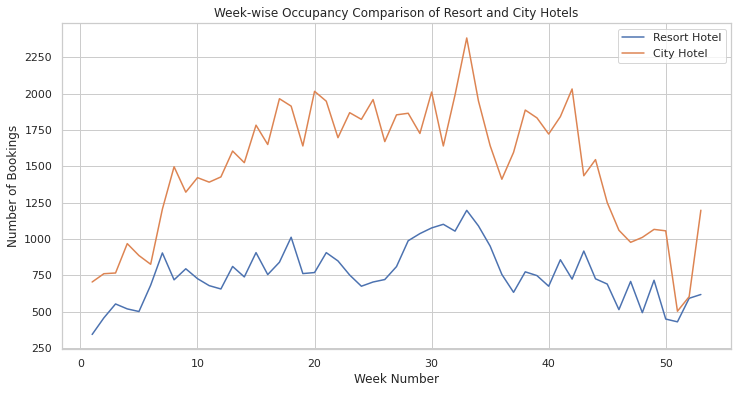

In [ ]:
# Set the figure size
plt.figure(figsize=(12,6))

# Calculate the mean of number of bookings per week
week_bookings_resort = df_resort.groupby(['arrival_date_week_number'])['hotel'].count()
week_bookings_city = df_city.groupby(['arrival_date_week_number'])['hotel'].count()

# Plot the week-wise bookings for Resort and City hotels
week_bookings_resort.plot(label='Resort Hotel')
week_bookings_city.plot(label='City Hotel')

# Add title and labels for the plot
plt.title('Week-wise Occupancy Comparison of Resort and City Hotels')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')

# Add legend
plt.legend()


# Show the plot
plt.show()

Number of bookings for resort and city hotels in weeks 30 to 38. The comparison of week-wise occupancy between resort and city hotels is shown in the plot.

**5 Type Of Customer**

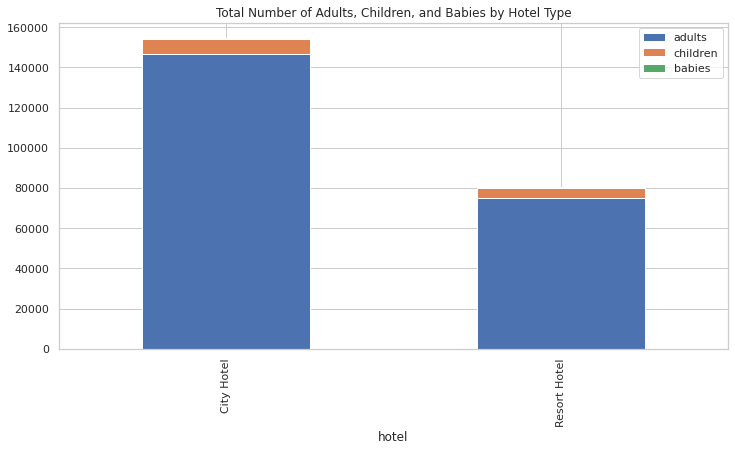

In [ ]:
# Group the data by 'hotel' and sum the number of adults, children, and babies for each hotel type
hotel_type_totals = df.groupby('hotel').sum()[['adults', 'children', 'babies']]

# Plot the totals as a stacked bar chart
hotel_type_totals.plot(kind='bar', stacked=True)

# Set the title of the plot to 'Total Number of Adults, Children, and Babies by Hotel Type'
plt.title('Total Number of Adults, Children, and Babies by Hotel Type')

# Show the plot
plt.show()

Based on the stacked bar chart, it appears that the majority of guests at both Resort and City hotels are adults. Children and babies make up a smaller portion of the total number of guests. This suggests that the hotels primarily cater to adult travelers and may not have many amenities specifically designed for families with young children

**6.Meals Booked By Customer**

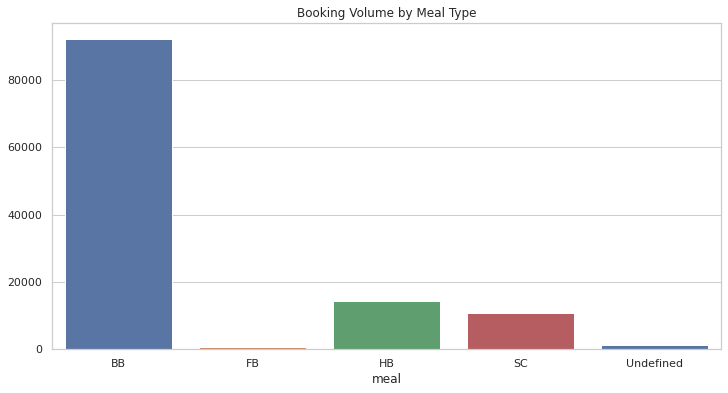

In [ ]:
# Group the data by meal type and count the number of bookings for each type
meal_counts = df.groupby('meal').count()['hotel']

# Plot the meal counts as a bar chart using sns
sns.set_color_codes("pastel")
palette = sns.color_palette("deep", 4)
sns.barplot(x=meal_counts.index, y=meal_counts.values, palette=palette)

# Set the title of the plot to 'Booking Volume by Meal Type'
plt.title('Booking Volume by Meal Type')

# Show the plot
plt.show()



The code is plotting meal type bookings for a hotel. Bed & Breakfast has the most bookings, while Full Board has the least. This information can help the hotel understand customer preferences and make informed decisions.

**8. Country**

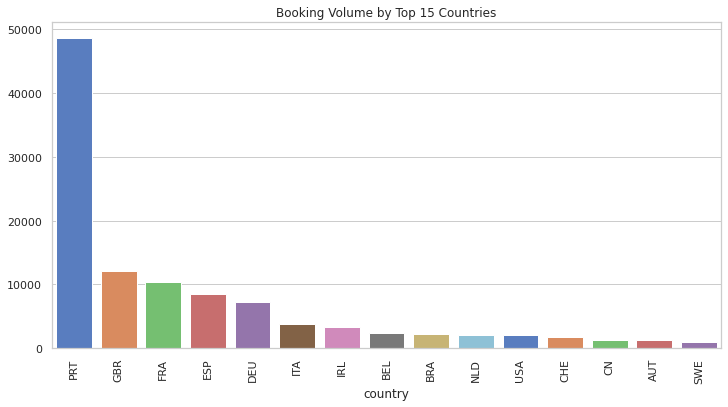

In [ ]:
# Group the data by country and count the number of bookings for each country
country_counts = df.groupby('country').count()['hotel'].sort_values(ascending=False)

# Select the first 15 countries
top_15_countries = country_counts[:15]

# Plot the top 15 countries as a bar chart using sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
palette = sns.color_palette("muted", 15)
sns.barplot(x=top_15_countries.index, y=top_15_countries.values, palette=palette)

# Set the title of the plot to 'Booking Volume by Top 15 Countries'
plt.title('Booking Volume by Top 15 Countries')
plt.xticks(rotation=90)

# Show the plot
plt.show()


Portugal has the highest number of bookings among these top countries. This information can help the hotel understand its target market and tailor its offerings to better meet the needs of its customers.

**9. Market Segment**

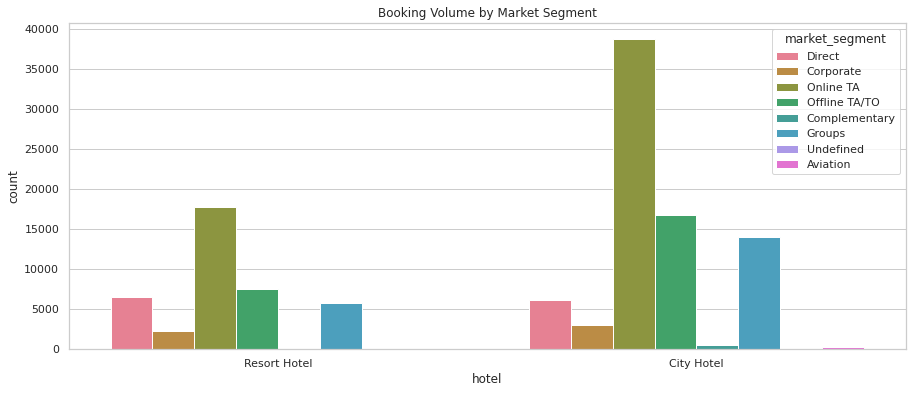

In [ ]:
# Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the countplot using Seaborn
sns.countplot(x='hotel', hue='market_segment', data=df, palette='husl')

# Set the title of the plot
plt.title("Booking Volume by Market Segment")

# Show the plot
plt.show()

The chart shows that the majority of bookings are made through the online market segment. This information can help the hotel understand how customers are booking their rooms and target its marketing efforts accordingly. The conclusion from the plot is that the online market segment is the primary source of bookings for the hotel.

**10 Percentage Of New & Old Customer **

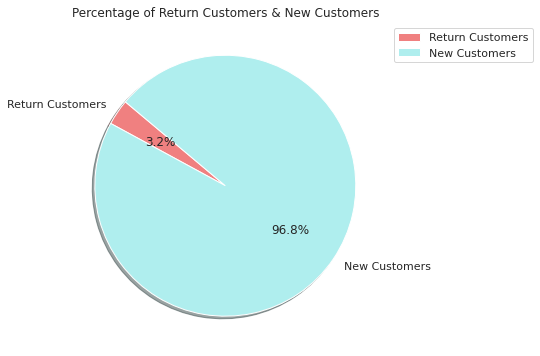

In [ ]:
# Count the number of total bookings
total_bookings = df.shape[0]

# Count the number of repeat customers
repeat_customers = df[df['is_repeated_guest'] == 1].shape[0]

# Calculate the percentage of repeat customers
percent_repeat_customers = (repeat_customers / total_bookings) * 100

# Plot the percentage of repeat customers as a pie chart
plt.pie([percent_repeat_customers, 100-percent_repeat_customers], labels=['Return Customers', 'New Customers'], colors=['lightcoral', 'paleturquoise'], autopct='%1.1f%%', shadow=True, startangle=140)

# Add a legend
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Set the title of the plot to 'Percentage of Return Customers'
plt.title('Percentage of Return Customers & New Customers')



# Show the plot
plt.show()




This code showing 96.8% customer are new 
and 3.2% are repeat customers. This information can be useful for hotel management to understand their customer behavior and target their marketing strategies towards attracting new customers and retaining repeat customers.

**11 Deposit**

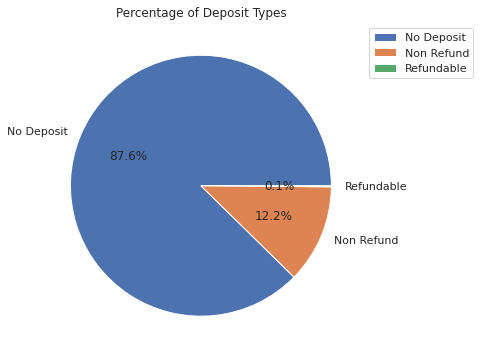

In [ ]:
# Calculate the number of occurrences of each deposit type
deposit_counts = df['deposit_type'].value_counts()

# Calculate the percentage of each deposit type
deposit_percentages = deposit_counts / deposit_counts.sum() * 100

# Plot the percentage of each deposit type as a pie chart using sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

plt.pie(deposit_percentages, labels=deposit_percentages.index, autopct='%.1f%%')

# Set the title of the plot to 'Percentage of Deposit Types'
plt.title('Percentage of Deposit Types')

# Add a legend to the plot and place it above and to the right
plt.legend(loc="upper left", bbox_to_anchor=(1,1))


# Show the plot
plt.show()

**12 Customer Type**

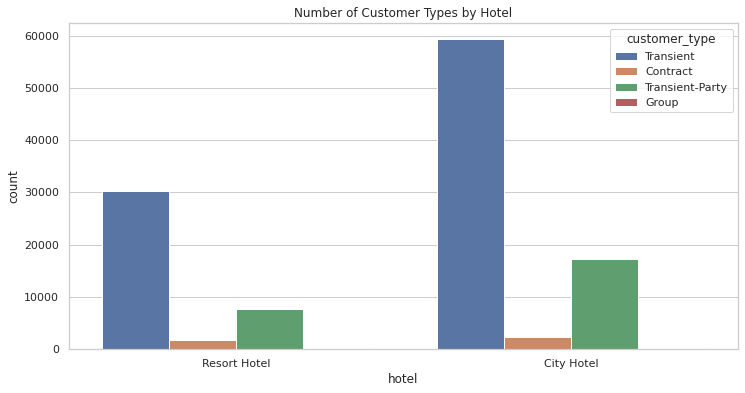

In [ ]:
# Plot the number of each customer_type for each hotel as a count plot
sns.countplot(x=df['hotel'], hue=df['customer_type'])

# Set the title of the plot to 'Number of Customer Types by Hotel'
plt.title('Number of Customer Types by Hotel')

# Show the plot
plt.show()

Most of the customers booking hotels are Transient, while a relatively small number are Group customers. This information can be useful for hotel management to understand their customer demographic and target their sales and marketing efforts accordingly. For example, they may need to offer different amenities or discounts to attract more Group customers. Additionally, the results may indicate a need for the hotel to focus more resources on catering to the needs of Transient customers.

**13 Average Daily Rate **

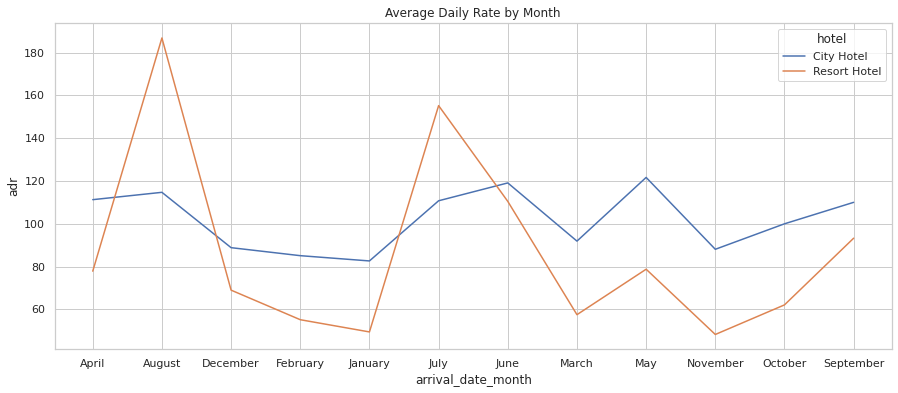

In [ ]:
#setting figure size
plt.figure(figsize=(15,6))

# Group the data by the arrival_date_month column and calculate the mean of the adr column for each group
monthly_adr = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()


# Plot the average daily rate for each month as a line chart
sns.lineplot(x="arrival_date_month", y="adr", hue="hotel", data=monthly_adr)


# Set the title of the plot to 'Average Daily Rate by Month'
plt.title('Average Daily Rate by Month')

# Show the plot
plt.show()

Based on the line chart, it can be seen that the average daily rate (ADR) in the months of August and July are higher compared to the other months. This indicates that these months may be the peak travel seasons for the hotels in the dataset, leading to higher demand and higher pricing

**14 Parking Space**

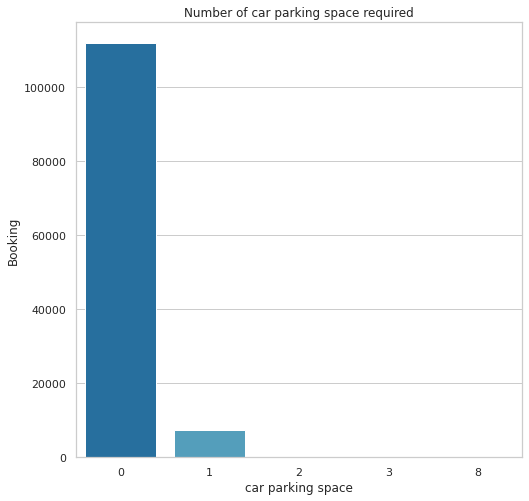

In [ ]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting countplot for car parking required
sns.countplot(x=df["required_car_parking_spaces"], palette='GnBu_r')

#setting labels for x, y and set title for countplot
plt.xlabel('car parking space')
plt.ylabel('Booking')
plt.title("Number of car parking space required")

#display the plot
plt.show()

 Majority of customers do not need car parking spaces, as the highest bar in the plot represents the largest number of bookings for a given number of required car parking spaces, and it is the bar corresponding to 0 required spaces.





**15 Special Guest**

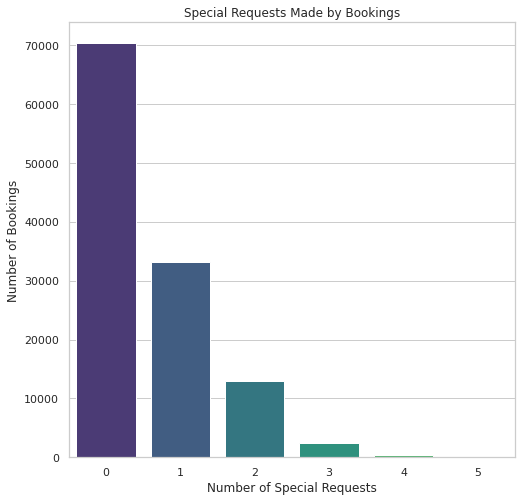

In [ ]:
# Setting the figure size
plt.figure(figsize=(8,8))

# Plotting a fancy countplot of the total_of_special_requests column
sns.countplot(x=df['total_of_special_requests'], palette='viridis')

# Adding labels for the x and y axes and a title
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.title('Special Requests Made by Bookings')

# Show the plot
plt.show()

**16 Reservation Status**

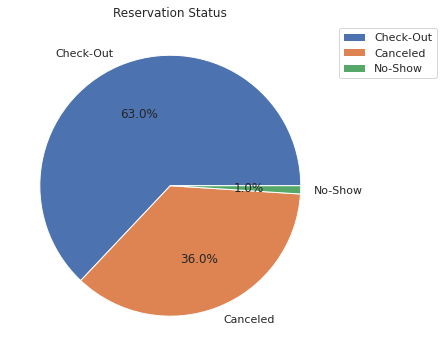

In [ ]:
# Set the seaborn style to "white" for a classic look
sns.set_style("white")

# Group the data by the reservation_status column and calculate the count for each group
status_counts = df['reservation_status'].value_counts().reset_index()

# Plot a pie chart of the reservation_status count
plt.pie(status_counts['reservation_status'], labels=status_counts['index'], autopct='%1.1f%%')

# Set the title of the plot to 'Reservation Status'
plt.title('Reservation Status')

# Add a legend to the plot and place it above and to the right
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Show the plot
plt.show()


Customers have checked out (63%) and a smaller proportion have cancelled their reservations (36%). This information can help hotel owners understand the distribution of reservations and make informed decisions on how to optimize their operations

**17 Average daily Rate(Lead Time)**

Text(0.5, 0, 'Lead time (days)')

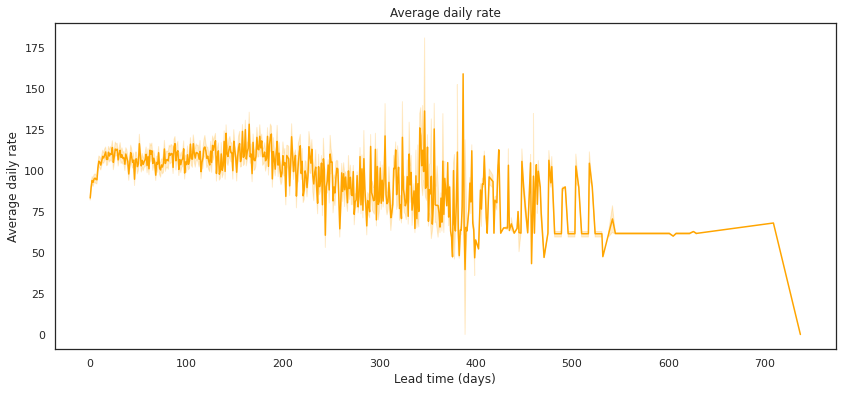

In [ ]:
#setting figure size
plt.figure(figsize=(14,6))

#Plotlineplot for ADR(lead time)
sns.lineplot(x=df["lead_time"],y=df["adr"],color="orange")

#set labels for x, y and set title for lineplot
plt.title("Average daily rate")
plt.ylabel("Average daily rate")
plt.xlabel("Lead time (days)")


Booking at least 175 days in advance does seem to give a lower price in general, or the next best would be to sweep up any last minute deals within 10 days of the booking.



**Correlation Matrix**

Text(0.5, 1.0, 'Co-relation of the columns')

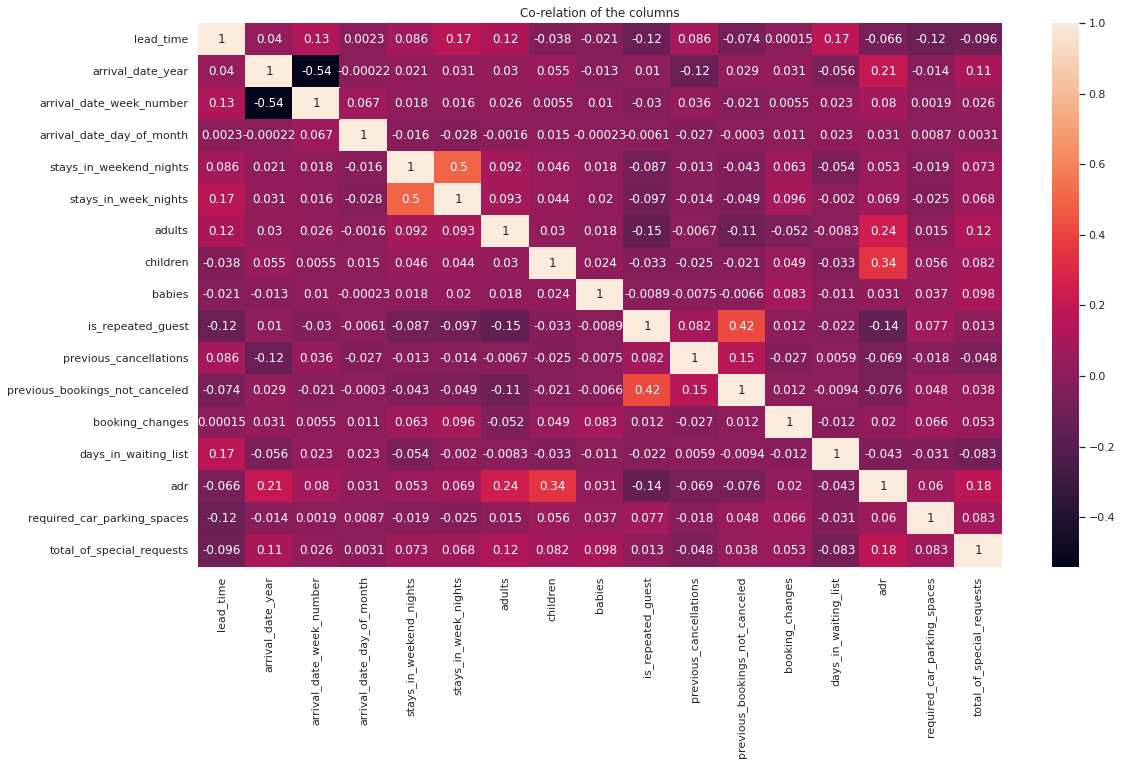

In [ ]:
#Droping three columns is_canceled, agent and company 
co_df=df.drop(['is_canceled','agent'],axis=1)

#Plotting correlation matrix for hotel booking dataframe
plt.figure(figsize=(18,10))
sns.heatmap(co_df.corr(),annot=True)
plt.title('Co-relation of the columns') 

**Conclusion**


1.City hotels are more popular in terms of booking volume compared to resort hotels.

2.City hotels receive the highest number of bookings in every month.

3.The most number of bookings were made in 2016.

4.Majority of guests at both City and Resort hotels are adults.

5.Bed & Breakfast has the most bookings among the meal types.

6.Portugal has the highest number of bookings among top countries.

7.Online market segment is the primary source of bookings for the hotel.

8.Most customers are new, with only a small percentage being repeat customers.

9.Transient customers make up the majority of bookings, while Group customers make up a smaller portion.

10.The average daily rate is higher in the months of August and July, which may be the peak travel seasons.